In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'factor_analyzer'

In [ ]:
gRandState = 42

In [2]:
def standardardized_data(data):
    return StandardScaler().fit_transform(data)

def get_eigenvalues(data, std_data, num_comp):
    eigenValues = []
    pca = PCA(n_components=num_comp, random_state=gRandState, whiten=True)
    pca.fit(std_data)
    n_samples = std_data.shape[0]
    # We center the data and compute the sample covariance matrix.
    data -= np.mean(std_data, axis=0)
    cov_matrix = np.dot(std_data.T, std_data) / n_samples
    for eigenvector in pca.components_:
        eigenValues.append(float("%.4f"%np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))))
    return np.array(eigenValues)

def get_eigenvectors(std_data, num_comp):
    pca = PCA(n_components=num_comp, random_state=gRandState, whiten=True)
    pca.fit(std_data)
    return pca.components_.T

def get_correlations(data):
    return pd.DataFrame(data).corr(method='pearson')


def print_scree_plot(eigvals, num_vars):
    fig = plt.figure(figsize=(8,5))
    sing_vals = np.arange(num_vars) + 1
    plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    #I don't like the default legend so I typically make mine like below, e.g.
    #with smaller fonts and a bit transparent so I do not cover up data, and make
    #it moveable by the viewer in case upper-right is a bad place for it 
    plt.show()
    
def get_loading_matrix(std_data):
    pca = PCA(n_components=5, random_state=42, whiten=True)
    pca.fit(X_std)
    return pca.components_.T * np.sqrt(pca.explained_variance_)

def pca_plot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    fig = plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.grid()
    plt.scatter(xs ,ys )
    
    plt.subplot(1, 2, 2)
    # theta goes from 0 to 2pi
    theta = np.linspace(0, 2*np.pi, 100)

    # the radius of the circle
    r = np.sqrt(1)
    # compute x1 and x2
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.05, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.gca().invert_yaxis()
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


In [6]:
data = arff.loadarff('data/5year.arff')
df = pd.DataFrame(data[0])
df.columns = ['net profit / total assets ','total liabilities / total assets ','working capital / total assets ','current assets / short-term liabilities ','[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 ','retained earnings / total assets ','EBIT / total assets ','book value of equity / total liabilities ','sales / total assets ','equity / total assets ','(gross profit + extraordinary items + financial expenses) / total assets ','gross profit / short-term liabilities ','(gross profit + depreciation) / sales ','(gross profit + interest) / total assets ','(total liabilities * 365) / (gross profit + depreciation) ','(gross profit + depreciation) / total liabilities ','total assets / total liabilities ','gross profit / total assets ','gross profit / sales ','(inventory * 365) / sales ','sales (n) / sales (n-1) ','profit on operating activities / total assets ','net profit / sales ','gross profit (in 3 years) / total assets ','(equity - share capital) / total assets ','(net profit + depreciation) / total liabilities ','profit on operating activities / financial expenses ','working capital / fixed assets ','logarithm of total assets ','(total liabilities - cash) / sales ','(gross profit + interest) / sales ','(current liabilities * 365) / cost of products sold ','operating expenses / short-term liabilities ','operating expenses / total liabilities ','profit on sales / total assets ','total sales / total assets ','(current assets - inventories) / long-term liabilities ','constant capital / total assets ','profit on sales / sales ','(current assets - inventory - receivables) / short-term liabilities ','total liabilities / ((profit on operating activities + depreciation) * (12/365)) ','profit on operating activities / sales ','rotation receivables + inventory turnover in days ','(receivables * 365) / sales ','net profit / inventory ','(current assets - inventory) / short-term liabilities ','(inventory * 365) / cost of products sold ','EBITDA (profit on operating activities - depreciation) / total assets ','EBITDA (profit on operating activities - depreciation) / sales ','current assets / total liabilities ','short-term liabilities / total assets ','(short-term liabilities * 365) / cost of products sold) ','equity / fixed assets ','constant capital / fixed assets ','working capital ','(sales - cost of products sold) / sales ','(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) ','total costs /total sales ','long-term liabilities / equity ','sales / inventory ','sales / receivables ','(short-term liabilities *365) / sales ','sales / short-term liabilities ','sales / fixed assets', 'bankruptcy']

In [8]:
df = df.dropna()

In [19]:
X = df.iloc[::, 0:64]
Y = df.iloc[::, 64]

In [20]:
X_std = standardardized_data(X)

In [23]:
print(get_eigenvalues(X, X_std, 64))

[ 1.54739e+01  8.68430e+00  5.87210e+00  3.11890e+00  2.90330e+00
  2.54730e+00  2.32270e+00  1.97050e+00  1.80330e+00  1.63070e+00
  1.58990e+00  1.18170e+00  1.03170e+00  1.01190e+00  1.00500e+00
  1.00020e+00  9.99400e-01  9.89700e-01  9.76900e-01  9.74400e-01
  9.38900e-01  8.14800e-01  7.58600e-01  6.19700e-01  5.20100e-01
  5.02700e-01  4.19600e-01  3.87100e-01  3.67500e-01  3.47400e-01
  3.02500e-01  1.76100e-01  1.27200e-01  1.19300e-01  8.99000e-02
  8.51000e-02  7.26000e-02  6.17000e-02  4.60000e-02  4.15000e-02
  2.42000e-02  1.65000e-02  1.46000e-02  1.30000e-02  1.14000e-02
  1.06000e-02  6.10000e-03  4.70000e-03  4.30000e-03  3.60000e-03
  3.00000e-03  8.00000e-04  4.00000e-04  2.00000e-04  2.00000e-04
  1.00000e-04  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00 -0.00000e+00]


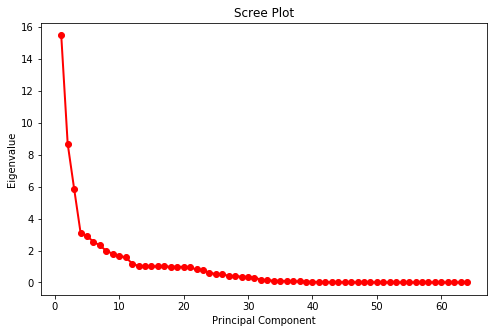

In [24]:
print_scree_plot(get_eigenvalues(X, X_std, 64), 64)

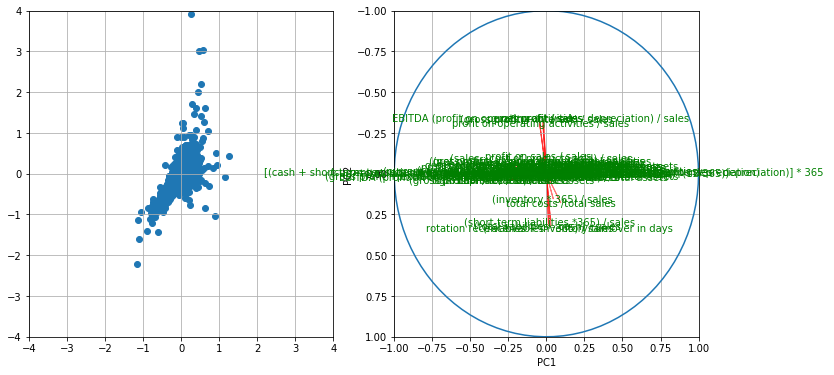